In [1]:
%matplotlib inline
from sympy import *
from pysde import *

import matplotlib.pylab as plt
from matplotlib import rc

In [2]:
x,dx,w,dw,t,dt,a=symbols('x dx w dw t dt a')
x0 =Symbol('x0'); t0 = Symbol('t0')
drift=2*x/(1+t)-a*(1+t)**2;diffusion=a*(1+t)**2
sol=SDE_solver(drift,diffusion,t0,x0)
pprint(sol)   

       2 ⎛              2                2               2     ⎞
(t + 1) ⋅⎝- a⋅t⋅(t₀ + 1)  + a⋅t₀⋅(t₀ + 1)  + a⋅w⋅(t₀ + 1)  + x₀⎠
────────────────────────────────────────────────────────────────
                                   2                            
                           (t₀ + 1)                             


The solution of SDE:
<br>
$$d X_t=-X_t dt+d X_t$$
<br>
is<br>
$$X_t = c e^t +e^t\int^t_{0}e^{-s}d W_s$$


In [3]:
"""
Jan Wehr,  Problems in SDEs, p12,2008
Here a bug,
"""
drift=-x;
diffusion=1.
sol=SDE_solver(drift,diffusion,0,x0)
pprint(sol)  

⎛      ⎛        2⋅t⎞⎞  -t
⎝x₀ + N⎝0, 0.5⋅ℯ   ⎠⎠⋅ℯ  


In [4]:
"""
Jan Wehr,  Problems in SDEs, p14,2008
"""
drift=-x;
diffusion=exp(-t)
sol=SDE_solver(drift,diffusion,0,x0)
pprint(sol)  

          -t
(w + x₀)⋅ℯ  


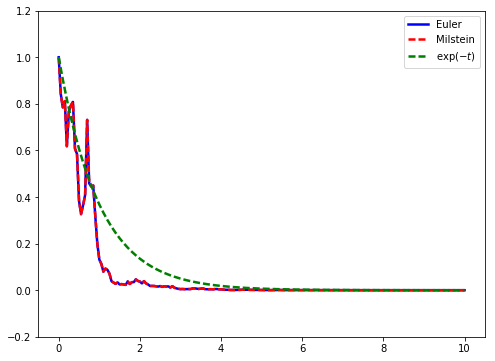

In [3]:
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

plt.figure(figsize=(8,6))
#plt.xlabel(r'Time $T$',size=14)
#plt.ylabel(r'$X_t$',size=14)
#plt.title(r'$d X_t=-X_t d t+X_t d W_t$',size=14)
plt.ylim(-0.5,1.5)
x0=1.;t0=0.;tn=10.

x,dx=symbols('x dx')

[a,b,c,d]=[0,-1.,0,1.]
drift=a+b*x
diffusion=c+d*x#

nt=200

T= linspace(t0, tn, nt+1)
X=Euler(drift,diffusion,x0,t0,tn,nt)
X,Y=Milstein(drift,diffusion,x0,t0,tn,nt)
plt.plot(T, X, color="blue", linewidth=2.5, linestyle="-", label="Euler")
plt.plot(T, X, color="red", linewidth=2.5, linestyle="--", label="Milstein")
plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")

plt.ylim(X.min()-0.2, X.max()+0.2)
#plt.title(r"$d X_t=-dt+d W_t,X_0=1$")
plt.legend()
#plt.savefig('Milstein.eps')

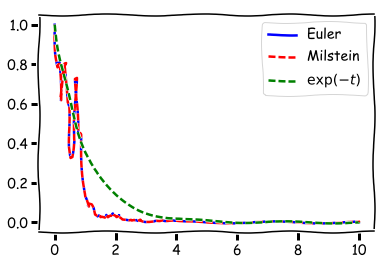

In [4]:
#rc('text', usetex=False)

with (plt.xkcd()):
     plt.plot(T, X, color="blue", linewidth=2.5, linestyle="-", label="Euler")
     plt.plot(T, X, color="red", linewidth=2.5, linestyle="--", label="Milstein")
     plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")
     plt.legend()   

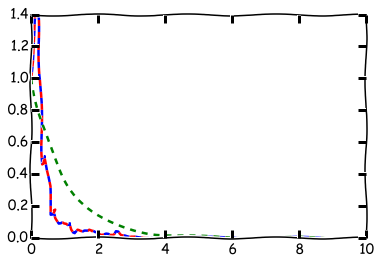

In [6]:
#rc('text', usetex=False)
plt.xkcd()
with (plt.xkcd()):
     plt.plot(T, X, color="blue", linewidth=2.5, linestyle="-", label="Euler")
     plt.plot(T, X, color="red", linewidth=2.5, linestyle="--", label="Milstein")
     plt.plot(T, np.exp(-T), color="green", linewidth=2.5, linestyle="--", label=r"$\exp(-t)$")

Kolmogorov Forward Equation
---
$$\frac{\partial f}{\partial t} = \frac{\partial \mu(x)f(t,x)}{\partial x} +\frac{\partial^2 (\sigma^2(x)f(x,t))}{\partial x^2}$$

(**Wright's Formula:** Stationary solution)

$$ f(x)=\frac{\phi}{\sigma^2}\cdot \exp\left({\int^x\frac{\mu(s)}{\sigma^2(s)}d s}\right) $$

where $\phi$ is chosen so as to make $\int^{\infty}_{-\infty}f(x) d x=1$

In [5]:
x,dx=symbols('x dx')
r,G,e,d=symbols('r G epsilon delta')

print("The pdf is of X which satisfies dX = r*(G-X) dt + e dW is:")
pprint (sde.KolmogorovFE_Spdf(r*(G-x),e))
print ("\nThe pdf is of X which satisfies dX = r*(G-X) dt + e*X dW is:")
pprint (sde.KolmogorovFE_Spdf(r*(G-x),e*x,0,oo))
l=sde.KolmogorovFE_Spdf(r*(G-x),e*x*(1-x),0,1)
print ("\nThe pdf is of X which satisfies dX = r*(G-X) dt + e*X*(1-X) dW is:")
pprint (l.subs({e:r*d}))

The pdf is of X which satisfies dX = r*(G-X) dt + e dW is:
      ⎛   2              ⎞
    r⋅⎝- G  + x⋅(2⋅G - x)⎠
    ──────────────────────
             2⋅ε          
√2⋅ℯ                      
──────────────────────────
                ___       
               ╱ ε        
       2⋅√π⋅  ╱  ─        
            ╲╱   r        

The pdf is of X which satisfies dX = r*(G-X) dt + e*X dW is:
                 -r⋅x 
            G⋅r  ─────
 G⋅r - 1 ⎛ε⎞       ε  
x       ⋅⎜─⎟   ⋅ℯ     
         ⎝r⎠          
──────────────────────
        Γ(G⋅r)        

The pdf is of X which satisfies dX = r*(G-X) dt + e*X*(1-X) dW is:
 G               G       1     
 ─ - 1         - ─ - 1 + ─     
 δ               δ       δ  ⎛1⎞
x     ⋅(-x + 1)           ⋅Γ⎜─⎟
                            ⎝δ⎠
───────────────────────────────
             ⎛  ⎛     1⎞⎞      
             ⎜G⋅⎜-1 + ─⎟⎟      
        ⎛G⎞  ⎜  ⎝     G⎠⎟      
       Γ⎜─⎟⋅Γ⎜──────────⎟      
        ⎝δ⎠  ⎝    δ     ⎠      


Type 
---
$$d X_t = \gamma \left( t, X_t \right) d t + b \left( t \right) X_t d W_t$$

Define

$$Y_t \left( \omega \right) = F_t \left( \omega \right) X_t \left( \omega \right)$$


where integrating factor


$$F_t = \exp \left( - \int^t_0 b \left( s \right) d W_t + \frac{1}{2} \int^t_0 b^2 \left( s \right) d s \right)$$



Then $Y_t \left( \omega \right)$ satisfies the solution



$$\begin{aligned} 
\frac{d Y_t \left( \omega \right)}{d t} &= &F_t \left( \omega \right) \cdot \gamma \left( t, F^{- 1}_t \left( \omega \right) Y_t \left( \omega \right) \right),  \cr 
Y_0 &=&x 
\end{aligned}$$


and $X_t = F^{- 1}_t Y_t$.

In [9]:
W =Symbol("W")
X = Function("X")(W)


a,b=symbols("a b")
A=a*t/X
B=b*X
sol=Reduce2(A,B)

print ("The solution is of dX = %s dt + %s dW is:" %(A,B))
pprint(sol)

The solution is of dX = a*t/X(W) dt + b*X(W) dW is:
                                                 2  
         _______________________________        b ⋅t
        ╱        ⌠                        W⋅b - ────
       ╱         ⎮    b⋅(-2⋅W + b⋅t)             2  
-√2⋅  ╱   C₁ + a⋅⎮ t⋅ℯ               dt ⋅ℯ          
    ╲╱           ⌡                                  


Diffusion with Jumps
---
A simple model which includes jumps in a financial model is described in the
text book of Lamberton and Lapeyre [7], Chapter 7. Essentially, it consists of
the usual Black-Scholes model described by the the scalar linear Ito
stochastic differential equation:

$$  d X_t = \mu X_t d t + \sigma X_t d W_t$$
within a time interval $[\tau_n, \tau_{n + 1})$ between jumps, with the jump
in $X_t$ at $\tau_n$ having magnitude:

$$  \Delta X_{\tau_n} = X_{\tau_n} - X_{\tau_{n^-}} = X_{\tau_{n^-}} U_n,$$
with $X_{\tau_n} = X_{\tau_{n^-}} (1 + U_n)$, where $X_{\tau_{n^-}} =
\lim\limits_{t \rightarrow \tau_{n^-}} X_t$, is the left limit from the
left, i.e. with $t < \tau_n$ and $U_n$  is the relative magnitude of the
jump.

The SDE has the explicit solution
$$ X_t = X_{t_0} e^{(\mu - \sigma^2 / 2) (t - t_0) + \sigma (W_t - W_{t_0})}$$
on a time interval $[t_0, t]$ without jumps.

The solution of stochastic differential equation with jumps:
$$  d X_t = \mu X_t d t + \sigma X_t d W_t+\gamma X_{t^-}d N_t$$
is in the explicit form:
\begin{eqnarray}
 X_t &=& X_{t_0} e^{(\mu - \sigma^2 / 2) (t - t_0) + \sigma (W_t - W_{t_0})}(1+\gamma)^{N_t}\\
      &=&  X_{t_0} e^{(\mu - \sigma^2 / 2) (t - t_0) + \sigma (W_t - W_{t_0}+N_t\log(1+\gamma))}
\end{eqnarray}

In [166]:
# generate jumps within time interval [0,1]
U=jump();
if len(U)!=0:
   print("there are %s jumps with amptitudes at time with magtitude:" %(len(U)))
   for i in range(len(U)):
       print("time = ",U[i][0],": ",U[i][1])
else:
   print("there is no jump generated.")  

there are 2 jumps with amptitudes at time with magtitude:
time =  0.4525421442004419 :  1.23910612918452
time =  0.6028298034372325 :  -0.755977044478192


In [233]:
UU=np.asarray(U,dtype="float")
UU.reshape(2,2)

array([[ 0.45254214,  1.23910613],
       [ 0.6028298 , -0.75597704]])

In [168]:
# Sum of log( 1 + gamma U)
S=jumpSum(U);S

-0.604416241352449

In [169]:
# djump(t0,t1,U): sum of the total jumps, delta N, between [t0,t1]
print(dJump(0,0.4,U),dJump(0,0.8,U),dJump(0,1,U))

0 0.483129084706323 0.483129084706323


In [170]:
X0=1;steps=100;mu=2;sigma=1;
gamm=1;lambd=1;muG=0;sigmaG=2;
WSteps=1000;T=1.

In [171]:
W=WPath(1,WSteps)
print(W[0:3])

[[0, 0.0], [0.001, -0.05130852981365178], [0.002, -0.0935685032896979]]


In [176]:
# Trajectory of jump-diffusion
t_arr,x_arr=np.array([]),np.array([])
for i in range(steps):
    t=i*T/steps;
    xtemp=X0*exp((mu-sigma**2./2.)*t\
          +sigma*Wt(W,t,T,WSteps)+jumpSum(U,t,gamm))
  
    t_arr=np.append(t_arr,t)
    x_arr=np.append(x_arr,xtemp)
  

In [173]:
jt=[jtime[0] for jtime in U];
jx=[jtime[1] for jtime in U]

[[<matplotlib.lines.Line2D at 0x10b97d7b8>],

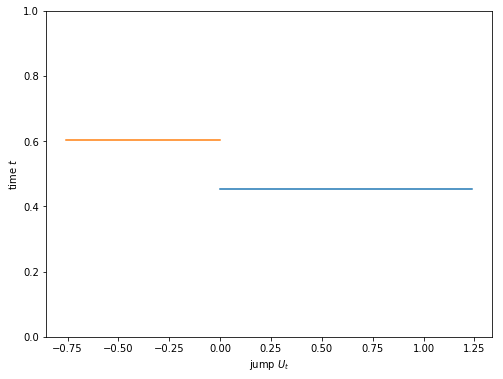

In [174]:
plt.figure(figsize=(8,6))
plt.ylim([0,1])
plt.ylabel(r"time $t$")
plt.xlabel(r"jump $U_t$")
[plt.plot([0,jx[i]],[jt[i],jt[i]]) for i in range(size(jt))]

In [140]:
# create the jump pictures if any, red for negative scale and blue for positive one
def jump_plot(U):
    jt=[jtime[0] for jtime in U];
    jx=[jtime[1] for jtime in U];
    for i in range(len(jt)):
        if (jx[i]>0):
           plt.plot([0,jx[i]],[jt[i],jt[i]],'b--');
        else:
           plt.plot([0,jx[i]],[jt[i],jt[i]],'r--'); 

In [176]:
# Trajectory of jump-diffusion
t_arr,x_arr=np.array([]),np.array([])
for i in range(steps):
    t=i*T/steps;
    xtemp=X0*exp((mu-sigma**2./2.)*t\
          +sigma*Wt(W,t,T,WSteps)+jumpSum(U,t,gamm))
  
    t_arr=np.append(t_arr,t)
    x_arr=np.append(x_arr,xtemp)
  

In [ ]:
def diff_jump_traj(U,mu=0,sigma=1,gamma=1,t0=0)

(0, 1)

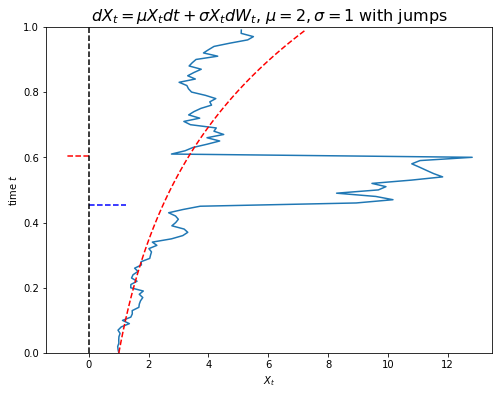

In [177]:
# Ito-Mckean style picture, jump-diffusion
plt.figure(figsize=(8,6))
plt.title(r"$d X_t = \mu X_t d t + \sigma X_t d W_t$, $\mu=2,\sigma=1$ with jumps",size=16)
#plt.plot(x_arr,t_arr,[0,jx[0]],[jt[0],jt[0]],[0,jx[1]],[jt[1],jt[1]]);
plt.plot(x_arr,t_arr);
jump_plot(U);
plt.plot(np.exp(2*t_arr),t_arr,'r--');
plt.plot([0,0],[0,1],'k--');
plt.ylabel(r"time $t$")
plt.xlabel(r"$X_t$")
plt.ylim([0,1])

In [236]:
# Trajectory of jump-diffusion
t_arr0,x_arr0=np.array([]),np.array([])
T0=jt[0]
X=Euler(mu,sigma,X0,0,T0,100)
t_arr0=np.linspace(0,T0,100)

for i in range(steps):
    t=i*T0/steps;
    xtemp=X0*exp((mu-sigma**2./2.)*t\
          +sigma*Wt(W,t,T0,WSteps)+jumpSum(U,t,gamm))
  
    t_arr0=np.append(t_arr0,t)
    x_arr0=np.append(x_arr0,xtemp)
  

In [273]:
# Trajectory of jump-diffusion
t_arr0,x_arr0=np.array([]),np.array([])
T0=1#jt[0]
x_arr0=Euler(mu*x,sigma*x,X0,0,T0,100)
t_arr0=np.linspace(0,T0,101)


In [295]:
def jump_diff_traj(U,X0=1,T0=1,drift=1,diffusion=0,gamma=1,steps=100):
    n=len(U)
    x_arr=np.array([])
    t_arr=np.array([])
    jt=[jtime[0] for jtime in U];
    jx=[jtime[1] for jtime in U]
    
    jjt=np.array([0])
    for i in range(len(jt)):
        jjt = np.append(jjt,jt[i])
    jjt = np.append(jjt,1)

    for i in range(len(U)+1):
        if i!=0:
           X0 = (1+jx[i-1])*x_arr[-1]
        x_arr0=np.array([])
        t_arr0=np.array([])
        x_arr0=Euler(drift,diffusion,X0,jjt[i],jjt[i+1],steps)
        t_arr0=np.linspace(jjt[i],jjt[i+1],101)
        
        t_arr=np.append(t_arr,t_arr0[:-1])
        x_arr=np.append(x_arr,x_arr0[:-1])
    return  t_arr,x_arr

6.16794730423708
1.22263480519581


(0, 1)

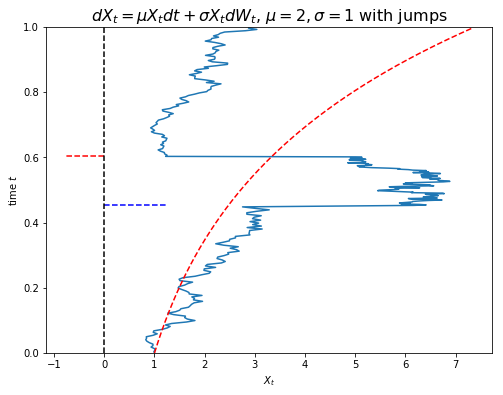

In [300]:
# Ito-Mckean style picture, jump-diffusion
plt.figure(figsize=(8,6))
plt.title(r"$d X_t = \mu X_t d t + \sigma X_t d W_t$, $\mu=2,\sigma=1$ with jumps",size=16)

t_arr,x_arr=jump_diff_traj(U,X0=1,T0=1,drift=mu*x,diffusion=sigma*x,gamma=1,steps=100)
plt.plot(x_arr,t_arr);
jump_plot(U);
plt.plot(np.exp(2*t_arr),t_arr,'r--');
plt.plot([0,0],[0,1],'k--');
plt.ylabel(r"time $t$")
plt.xlabel(r"$X_t$")
plt.ylim([0,1])